### Content Via Kaggle


"The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise" (Kaggle).

https://www.kaggle.com/mlg-ulb/creditcardfraud 

### Variable Explanation 

PCA transformation:
The purpose of a dimensionality reduction is to simply reduce the number of variables in a data set to a comparable scale. In this case the PCA transformation also serves to obscure the original features which causes ethical issues with personal information 
With a large data set such as the one we have with over 284,000 records, and over 30 variables it becomes necessary to scale down the dimensionality. The scaling also allows for much faster machine learning, nice visualizations, and simplicity. 

V1-V28:   The data's features only holds numerical imput variables. This is the output from Principal Component Analysis. (PCA)

Amount: Transaction amount for each given record.

Class: The binary response variable that records 1 in the case of fraud and 0 otherwise.

Time: Seconds passed between the initial transaction and the given transaction. 


In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import metrics
%matplotlib inline 
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# The fraud filter displays 492 rows & 31 columns. 
# The non fraud class provides 284,315 rows & 31 columns. 

filt = (df['Class'] == 1)
fraud = df[filt]

filt_2 = (df['Class'] == 0)
non_fraud = df[filt_2]

In [5]:
# This cell represents the percentage breakdown of fraud versus non fraud. 

print("A percentage breakdown of fraud versus non fraud in the dataset.\n")
diff = df['Class'].value_counts(normalize = True)
print(diff)

print("\nThe actual numbers in the set accounted for in fraud versus non fraud\n")
fraud_breakdown = df['Class'].value_counts()
print(fraud_breakdown)

A percentage breakdown of fraud versus non fraud in the dataset.

0    0.998273
1    0.001727
Name: Class, dtype: float64

The actual numbers in the set accounted for in fraud versus non fraud

0    284315
1       492
Name: Class, dtype: int64



The general NON FRAUD set statistics:

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64



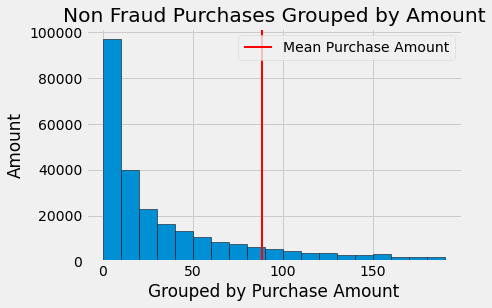

In [6]:
# initialize our series in order to create histograms
nf_amount = non_fraud["Amount"]
f_amount = fraud["Amount"]

print("\nThe general NON FRAUD set statistics:\n\n" + str(non_fraud.Amount.describe())+'\n')

plt.style.use('fivethirtyeight')
bins = list(range(0, 200, 10))
plt.hist(nf_amount, bins = bins, edgecolor = "black")
median_nf = nf_amount.mean()
plt.axvline(median_nf, color = 'red', label = 'Mean Purchase Amount', linewidth = 2)

plt.title('Non Fraud Purchases Grouped by Amount')
plt.xlabel('Grouped by Purchase Amount')
plt.ylabel('Amount')
plt.legend();


The general FRAUD set statistics:

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64



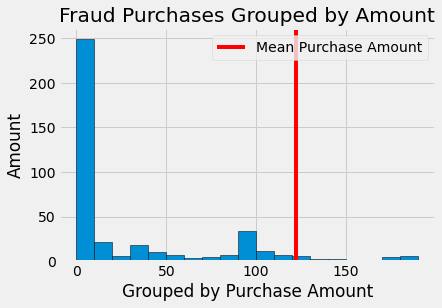

In [7]:
print("\nThe general FRAUD set statistics:\n\n" + str(fraud.Amount.describe())+'\n')

plt.style.use('fivethirtyeight')
bins = list(range(0, 200, 10))
plt.hist(f_amount, bins = bins, edgecolor = "black")
mean_fraud = f_amount.mean()
plt.axvline(mean_fraud, color = 'red', label = 'Mean Purchase Amount')

plt.title('Fraud Purchases Grouped by Amount')
plt.xlabel('Grouped by Purchase Amount')
plt.ylabel('Amount')
plt.legend();


In [8]:
# distribution calc (data density by class)

lower_bound = int(input("What is the lower bound for your desired number range? "))
upper_bound = int(input("What is the upper bound for your desired number range? "))

def nf_likelihood():
    all_transactions = df.loc[:, ['Class', 'Amount']]
    filtered_to_NF = all_transactions[filt_2]
    purchase_expense = (filtered_to_NF['Amount'].between(lower_bound, upper_bound))
    z = pd.DataFrame(filtered_to_NF.loc[purchase_expense, 'Amount'])
    total_count = int(non_fraud['Amount'].count())
    var = int(z['Amount'].count())
    chances = (var/total_count)
    return (round(chances,6))
    
output = nf_likelihood()

print("\nBased on the given dataset....\nThere is a ", output, "percent chance of a NON FRAUD purchase falling between", lower_bound,'and' ,upper_bound, 'in this given dataset \n')



def f_likelihood():
    all_transactions = df.loc[:, ['Class', 'Amount']]
    filtered_to_F = all_transactions[filt]
    purchase_expense = (filtered_to_F['Amount'].between(lower_bound, upper_bound))
    z = pd.DataFrame(filtered_to_F.loc[purchase_expense, 'Amount'])
    total_count = int(fraud['Amount'].count())
    var = int(z['Amount'].count())
    chances = (var/total_count)
    return (round(chances,6))
    

output_2 = f_likelihood()
print("Based on the given dataset....\nThere is a ", output_2, "percent chance of a FRAUD purchase falling between", lower_bound,'and' ,upper_bound, 'in this given dataset \n')




What is the lower bound for your desired number range? 1
What is the upper bound for your desired number range? 800

Based on the given dataset....
There is a  0.925459 percent chance of a NON FRAUD purchase falling between 1 and 800 in this given dataset 

Based on the given dataset....
There is a  0.833333 percent chance of a FRAUD purchase falling between 1 and 800 in this given dataset 



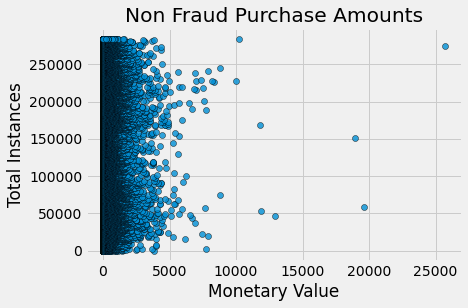

In [9]:
fill = np.arange(0, 284315)

o = non_fraud['Amount']
plt.scatter(o, fill, edgecolor = 'black', alpha = .8)
plt.title('Non Fraud Purchase Amounts')
plt.xlabel('Monetary Value')
plt.ylabel('Total Instances');

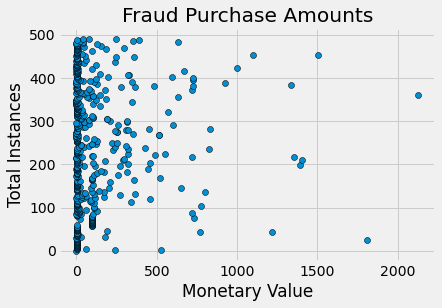

In [10]:
fill = np.arange(0, 492)
o = fraud['Amount']
plt.scatter(o, fill, edgecolor = 'black')
plt.title('Fraud Purchase Amounts')
plt.ylabel("Total Instances")
plt.xlabel("Monetary Value");

### SMOTE APPROACH ALTERNATIVE TO OVERSAMPLING

SMOTE utilizes a KNN algorithm to identify neighbors by the relative minority class and links via lines. Synthetic data is created at various points. A negative point to SMOTE is that the synthetic data is reproduced without taking into consdiration the majority class. 

vs. Oversampling Randomly duplicates samples in the fraud class. 
Duplicated samples are identical to data already recorded, and no new information is added. 

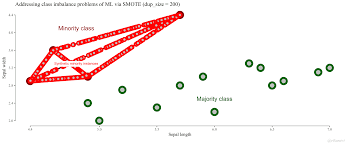

In [11]:
# use original unbalanced dataframe, and break down into training and test labels. 
# B possesses class labels, and A has all of the variables. 

df 

B = df['Class']
A = df.drop('Class', axis=1)

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.25, random_state = 45)

The code below was taken from

Radecic, D (2021) How to Efforlessly Handle Class Imbalance with Python and SMOTE [Source code]. https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7

In [12]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

A_sm, B_sm = sm.fit_resample(A, B)

print(f'''Shape of A before SMOTE: {A.shape}
Shape of A after SMOTE: {A_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
B_sm.value_counts(normalize=True) * 100

Shape of A before SMOTE: (284807, 30)
Shape of A after SMOTE: (568630, 30)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Class, dtype: float64

### OVERSAMPLING APPROACH TO CREATE SYNTHETIC DATA

In [13]:
# oversampling original dataset for another outlet of synthetic data. 
# Take the fraud set and resample 284315 times. 

print("Shape of the fraud set: \n" +str(fraud.shape))
print("Shape of the non-fraud set: \n"+str(non_fraud.shape))
fraud_oversample = fraud.sample(284315, replace = True)
print("Shape on the fraud oversample set: \n" + str(fraud_oversample.shape))

Shape of the fraud set: 
(492, 31)
Shape of the non-fraud set: 
(284315, 31)
Shape on the fraud oversample set: 
(284315, 31)


In [14]:
# once we have seperate instances of fraud and nonfraud at 284315 we combine the dataset into one frame. 

synthetic_df = pd.concat([non_fraud, fraud_oversample], axis = 0)

print("The fraud data has been synthetically reproduced, and is now stored in the dataframe synthetic_df. \nThe cases of fraud and non-fraud are now equally distributed.")
synthetic_df['Class'].value_counts()

synthetic_df

The fraud data has been synthetically reproduced, and is now stored in the dataframe synthetic_df. 
The cases of fraud and non-fraud are now equally distributed.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16415,27784.0,0.288029,0.965681,-1.459495,1.921863,-1.912414,-1.130282,-2.814263,0.648663,-0.695263,...,0.603127,0.380690,-0.064125,0.271380,0.337220,0.626156,0.565125,0.305925,23.36,1
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1
157868,110547.0,-1.532810,2.232752,-5.923100,3.386708,-0.153443,-1.419748,-3.878576,1.444656,-1.465542,...,0.632505,-0.070838,-0.490291,-0.359983,0.050678,1.095671,0.471741,-0.106667,0.76,1
72757,54846.0,-2.986466,-0.000891,0.605887,0.338338,0.685448,-1.581954,0.504206,-0.233403,0.636768,...,-0.875146,-0.509849,1.313918,0.355065,0.448552,0.193490,1.214588,-0.013923,1.79,1


### PREPPING OVERSAMPLING DATA THROUGH TRAIN TEST SPLIT

The train test split method breaks the synthetic dataframe into 2 different subsets. 
The first step to operate correctly is to establish features and labels. The features are the given attributes which influence the final output (labels). In this case, the features are the PCA transformation variables, and the labels are the fraud or non fraud classification. 

The initial split break is as follows:
X_train & y_train : 75%
X_test & y_test : 25%


In [15]:
labels = synthetic_df['Class']
features = synthetic_df.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [16]:
# create a for loop to confirm our distributions. 
for dataset in [X_train, X_test]:
    print(round(len(dataset)/ len(labels), 2))

0.75
0.25


### RANDOM FOREST w/ OVERSAMPLE & SMOTE

Based on prior research Random Forest produces best results when dealing with credit card fraud detection. Therefore, the goal was to hone in on creating the best algorithm. Given two artificial datasets the hyperparameter tuning and testing began. 

When creating a random forest, the forest is built out of many different decision trees. Hence we look to build individual decision trees with our strongest indicators for our binary classification problem at the top. Meaning the variable with the lowest impurity score, and best probability of correctly classifying a credit card transaction correctly gets put at the top. As the tree moves along, the impurity scores will naturally drop. 
The main factor that determines if the tree splits again is if the benefit is offered via a lower impurity score, or a higher chance of classfiying correctly. If the initial split does a better job then adding in another variable to the mix it becomes a leaf node and solidifies.

In a random forest, this process of creating decision trees is done hundreds of times. This effectively filters out the noise, and selects the best model.
We randomly select variables as candidates at each split, and designate the lowest impurity score with a top down approach, as seen in the Decision Trees above. This process is repeated hundreds of times and considers a 
limited set of variables at each remaining split. 
We run our individual records through each decision tree, and then the trees submit a majority vote as fraud or non-fraud ultimately classifying our data. This is also known as bagging because we are using an aggregate decision off of a bootstrapped dataset. 

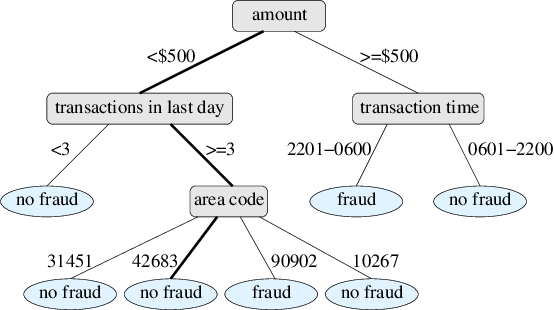

Picture located from:

Kalyanakrishnan, S., Singh, D. and Kant, R. (2014). On Building Decision Trees from Large-scale Data in Applications of On-line Advertising. CIKM. [online] Available at: https://www.semanticscholar.org/paper/On-Building-Decision-Trees-from-Large-scale-Data-in-Kalyanakrishnan-Singh/53391c2d071f14b1f4710c144951e5d6b1bfe188 [Accessed 3 Aug. 2021].

We randomly select variables as candidates at each split, and designate the lowest impurity score with a top down approach, as seen in the Decision Trees above. This process is repeated hundreds of times and considers a 
limited set of variables at each remaining split. 
We run our individual records through each decision tree, and then the trees submit a majority vote as fraud or non-fraud ultimately classifying our data. 


In [17]:
# first create random forest classifier, and create an instance by fitting the classifier on X_train, and y_train
# utilizing our oversampled data set

# Two instances of a random forest classifier are created with two different options for evaluating the impurity split: 
# Entropy, and Gini. Each of the instances are fit on the synthetically oversampled dataset. The same is done below but
# for the SMOTE dataset with default parameters. 

rf_oversample_G = RandomForestClassifier(criterion = 'gini', random_state = 22)
rf_oversample_E = RandomForestClassifier(criterion = 'entropy', random_state = 32)
rf_oversample_G.fit(X_train, y_train)
rf_oversample_E.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=32)

In [18]:
rf_smote_G = RandomForestClassifier(criterion = 'gini', random_state = 22)
rf_smote_E = RandomForestClassifier(criterion = 'entropy', random_state = 32)
rf_smote_G.fit(A_train, B_train)
rf_smote_E.fit(A_train, B_train)

RandomForestClassifier(criterion='entropy', random_state=32)

## Gini Impurity verus Entropy



In [20]:
# Accuracy of the model when predicting potential y_test outputs for the X_test set using our Random Forest 
# oversampled model that we trained upon. 
# It is important to note that accuracy is a measure of correctly classified instances divided by the total number of
# instances, hence the high scores. All instances will have tons of correctly classified labels, but what is relevant 
# in this scenario is minimizing the number of misclassified cases. 


print("RF model (Gini) - OVERSAMPLE" +"     ",(round(rf_oversample_G.score(X_test, y_test),7)))
print("RF model (Entropy) - OVERSAMPLE"+"  ", (round(rf_oversample_E.score(X_test, y_test),7)))

print("\nRF model (Gini) - SMOTE" +"          ",(round(rf_smote_G.score(A_test, B_test),7)))
print("RF model (Entropy) - SMOTE" +"       ", (round(rf_smote_E.score(A_test, B_test), 7)))

RF model (Gini) - OVERSAMPLE      0.9999508
RF model (Entropy) - OVERSAMPLE   0.9999648

RF model (Gini) - SMOTE           0.9995927
RF model (Entropy) - SMOTE        0.9995927


In [120]:
# Create a logistic regression classifier as a compair

lr = LogisticRegression()

log_reg = lr.fit(A_train, B_train)

/Users/sammarcustaylor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
lr_falsePos, lr_truePos, _ = roc_curve(y_test, lr_probs)

### The Relevance of AUC & ROC

In [130]:
from sklearn.metrics import roc_curve, roc_auc_score

In [131]:
r_probs_baseline = [0 for _ in range(len(y_test))]
lr_probs = log_reg.predict_proba(X_test)
rf_probs = rf_smote_G.predict_proba(X_test)

In [132]:
# probabilities for positive outcome is stored in a numpy array 
rf_probs = rf_probs[:,1]
lr_probs = lr_probs[:,1]

In [133]:
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
baseline_auc = roc_auc_score(y_test, r_probs_baseline)

In [134]:
rf_falsePos, rf_truePos, _ = roc_curve(y_test, rf_probs)
r_falsePos, r_truePos, _ = roc_curve(y_test, r_probs_baseline)
lr_falsePos, lr_truePos, _ = roc_curve(y_test, lr_probs)

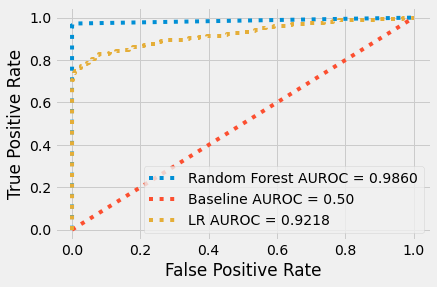

In [135]:
plt.plot(rf_falsePos, rf_truePos, label = 'Random Forest AUROC = %0.4f' % rf_auc, linestyle = ":")
plt.plot(r_falsePos, r_truePos, label = 'Baseline AUROC = %0.2f' % baseline_auc, linestyle = ":")
plt.plot(lr_falsePos, lr_truePos, label = 'LR AUROC = %0.4f' % lr_auc, linestyle = ":")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('')
plt.legend();

Behind the Red Baseline:

The false positive rate applies to the right side of the confusion matrix. We take into consideration false positives, and true negatives in our ML classification. After passing into the formula the baseline provides a model that has no true negatives, but all false positives. 
The true positive rate applies to the left side of the confusion matrix. We take into cosideration the True Postives and False negatives in our ML classification. After passing into the formula, the baseline provides a model that has true positives, but no false negatives. 

The red baseline provides a model with a 100% true positive, and 100% false negative which is what we use to measure our AUC (area under the curve)

This graphical representation further confirms the success of our Random Forest model. We can have an almost perfect True Positive Rate, while minimizing our False Positive Rate to almost nothing. 
With Logistic Regression it is visibly seen, that in order to get a higher True Positive rate of 70 % there must be a give and take for the false positive rate. 

### OPTIMIZING HYPERPARAMETERS

The function code below was taken from

Jedamski, D (2021) Applied Machine Learning: Foundations [Source code]. https://www.linkedin.com/learning/applied-machine-learning-foundations/leveraging-machine-learning?u=56744785 

In [78]:
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [79]:
# Pruning 
# CV limited to 2 due to run time. 

RFC = RandomForestClassifier(criterion = 'gini', random_state = 22)
parameters = {'n_estimators' : [5, 50, 100], 'max_depth' : [2, 4, 8, 16, 32]}

cv = GridSearchCV(RFC, parameters, cv = 2, verbose = 2, scoring='roc_auc')
cv.fit(A_train, B_train.values.ravel())

print_results(cv)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[CV] END ........................max_depth=2, n_estimators=5; total time=   1.0s
[CV] END ........................max_depth=2, n_estimators=5; total time=   0.7s
[CV] END .......................max_depth=2, n_estimators=50; total time=   6.7s
[CV] END .......................max_depth=2, n_estimators=50; total time=   6.9s
[CV] END ......................max_depth=2, n_estimators=100; total time=  14.1s
[CV] END ......................max_depth=2, n_estimators=100; total time=  17.0s
[CV] END ........................max_depth=4, n_estimators=5; total time=   2.2s
[CV] END ........................max_depth=4, n_estimators=5; total time=   1.9s
[CV] END .......................max_depth=4, n_estimators=50; total time=  13.1s
[CV] END .......................max_depth=4, n_estimators=50; total time=  12.2s
[CV] END ......................max_depth=4, n_estimators=100; total time=  24.6s
[CV] END ......................max_depth=4, n_es

In [93]:
cv.best_estimator_

RandomForestClassifier(max_depth=16, random_state=22)

In [94]:
rf_2 = RandomForestClassifier(max_depth = 16, n_estimators = 100, random_state = 32)

In [95]:
# fit on smote training data
rf_2.fit(A_train, B_train)

RandomForestClassifier(max_depth=16, random_state=32)

In [111]:
# use optimal Random Forest Classifier to make predictions for SMOTE data set 

new_pred = rf_2.predict(A_test)

In [158]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(B_test, new_pred)
cm

array([[71059,     5],
       [   25,   113]])

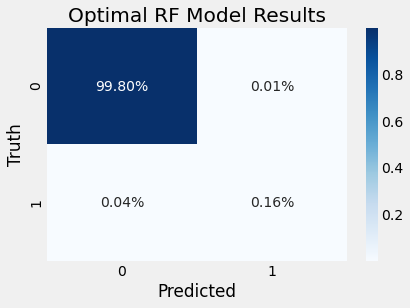

<Figure size 504x504 with 0 Axes>

In [163]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues');

plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Optimal RF Model Results');

plt.figure(figsize = (7, 7));

### The optimal model falsely predicts 5 non fraud transactions as fraud. (0.01%)
### The optimal model falsely predicts 25 fraud transactions as non fraud. (0.04%)

### The optimal model correctly predicts 71059 non fraud transactions correct.(99.80%)
### The optimal model correctly predicts 113 fraud transactions correct. (0.16%)

In [164]:
from sklearn.metrics import classification_report
print(classification_report(B_test, new_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71064
           1       0.96      0.82      0.88       138

    accuracy                           1.00     71202
   macro avg       0.98      0.91      0.94     71202
weighted avg       1.00      1.00      1.00     71202



### Metrics

Precision -  number predicted correctly / total examples

Recall - number predicted as surviving that were actually fraud / total number that were fraud

f1-score - the weighted average of precision and recall. 

Bias - the algorithm's tendency to consistently learn the wron gthing by not taking into account all the information in the data 

High bias - a result of the algorithm mising the relevant relations between features and target outputs. Model does not understand the aiming point. Predictions are off based systematically. 

Variance - refers to an algorithms sensitivity to small fluctuations in the training set.

High Variance - is a result of the algorithm fitting to random noise in the training data. Very likely the model is overfitting, and would excel on the training data. 

Underfitting - occures when an algorithm cannot capture the underlying trend of the data. And that happens when we have a model that is too simple with high bias and low variance, which results in a high total error. 

Overfitting - occurs when an algorithm fits too closely to the training set and just memorizes examples. This results in low bias and high variance, which drives high total error because data is all spread out.